Neural network

In [6]:
#exercise 5, task 1
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical

# Load and preprocess the lyrics dataset
with open('leonard-cohen.txt', 'r', encoding='utf-8') as file:
    lyrics = file.read()

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([lyrics])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
sequence_length = 5
input_sequences = []
words = lyrics.split()
for i in range(len(words) - sequence_length):
    sequence = words[i : i + sequence_length]
    input_sequences.append(sequence)

# Tokenize input sequences
input_sequences = tokenizer.texts_to_sequences([' '.join(seq) for seq in input_sequences])

# Split the data into predictors and labels
X = [sequence[:-1] for sequence in input_sequences]
y = [sequence[-1] for sequence in input_sequences]
X = pad_sequences(X)

# One-hot encode the labels
y = to_categorical(y, num_classes=total_words)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a neural network with LSTM layer
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=X.shape[1]))
model.add(LSTM(128))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=1)

# Function to generate lyrics from an initial sentence
def generate_lyrics(model, tokenizer, initial_sentence, length=100, temperature=1.0):
    generated_lyrics = initial_sentence
    tokenized_sentence = tokenizer.texts_to_sequences([initial_sentence])[0]

    for _ in range(length):
        # Pad the tokenized sentence to match the input shape of the model
        padded_sentence = pad_sequences([tokenized_sentence], maxlen=model.input_shape[1], padding='post')

        # Predict the next word (considering the temperature for randomness)
        predictions = model.predict(padded_sentence)[0]
        predicted_word_index = np.random.choice(len(predictions), p=predictions)
        predicted_word = tokenizer.index_word[predicted_word_index]

        # Append the predicted word to the generated lyrics
        generated_lyrics += ' ' + predicted_word

        # Update the initial sentence for the next iteration
        tokenized_sentence.append(predicted_word_index)
        tokenized_sentence = tokenized_sentence[1:]

    return generated_lyrics

# Example:
initial_sentence = "Hallelujah"
generated_lyrics = generate_lyrics(model, tokenizer, initial_sentence, length=50, temperature=0.5)
print(generated_lyrics)


Epoch 1/10
492/492 [==============================] - 24s 44ms/step - loss: 6.2640 - accuracy: 0.0530
Epoch 2/10
492/492 [==============================] - 17s 35ms/step - loss: 5.8283 - accuracy: 0.0649
Epoch 3/10
492/492 [==============================] - 18s 37ms/step - loss: 5.5870 - accuracy: 0.0752
Epoch 4/10
492/492 [==============================] - 19s 40ms/step - loss: 5.2712 - accuracy: 0.1079
Epoch 5/10
492/492 [==============================] - 20s 40ms/step - loss: 4.9244 - accuracy: 0.1431
Epoch 6/10
492/492 [==============================] - 17s 35ms/step - loss: 4.5946 - accuracy: 0.1761
Epoch 7/10
492/492 [==============================] - 17s 35ms/step - loss: 4.2863 - accuracy: 0.2134
Epoch 8/10
492/492 [==============================] - 18s 37ms/step - loss: 3.9985 - accuracy: 0.2478
Epoch 9/10
492/492 [==============================] - 19s 39ms/step - loss: 3.7274 - accuracy: 0.2852
Epoch 10/10
1/1 [==============================] - 0s 28ms/step
Hallelujah you you

SOM

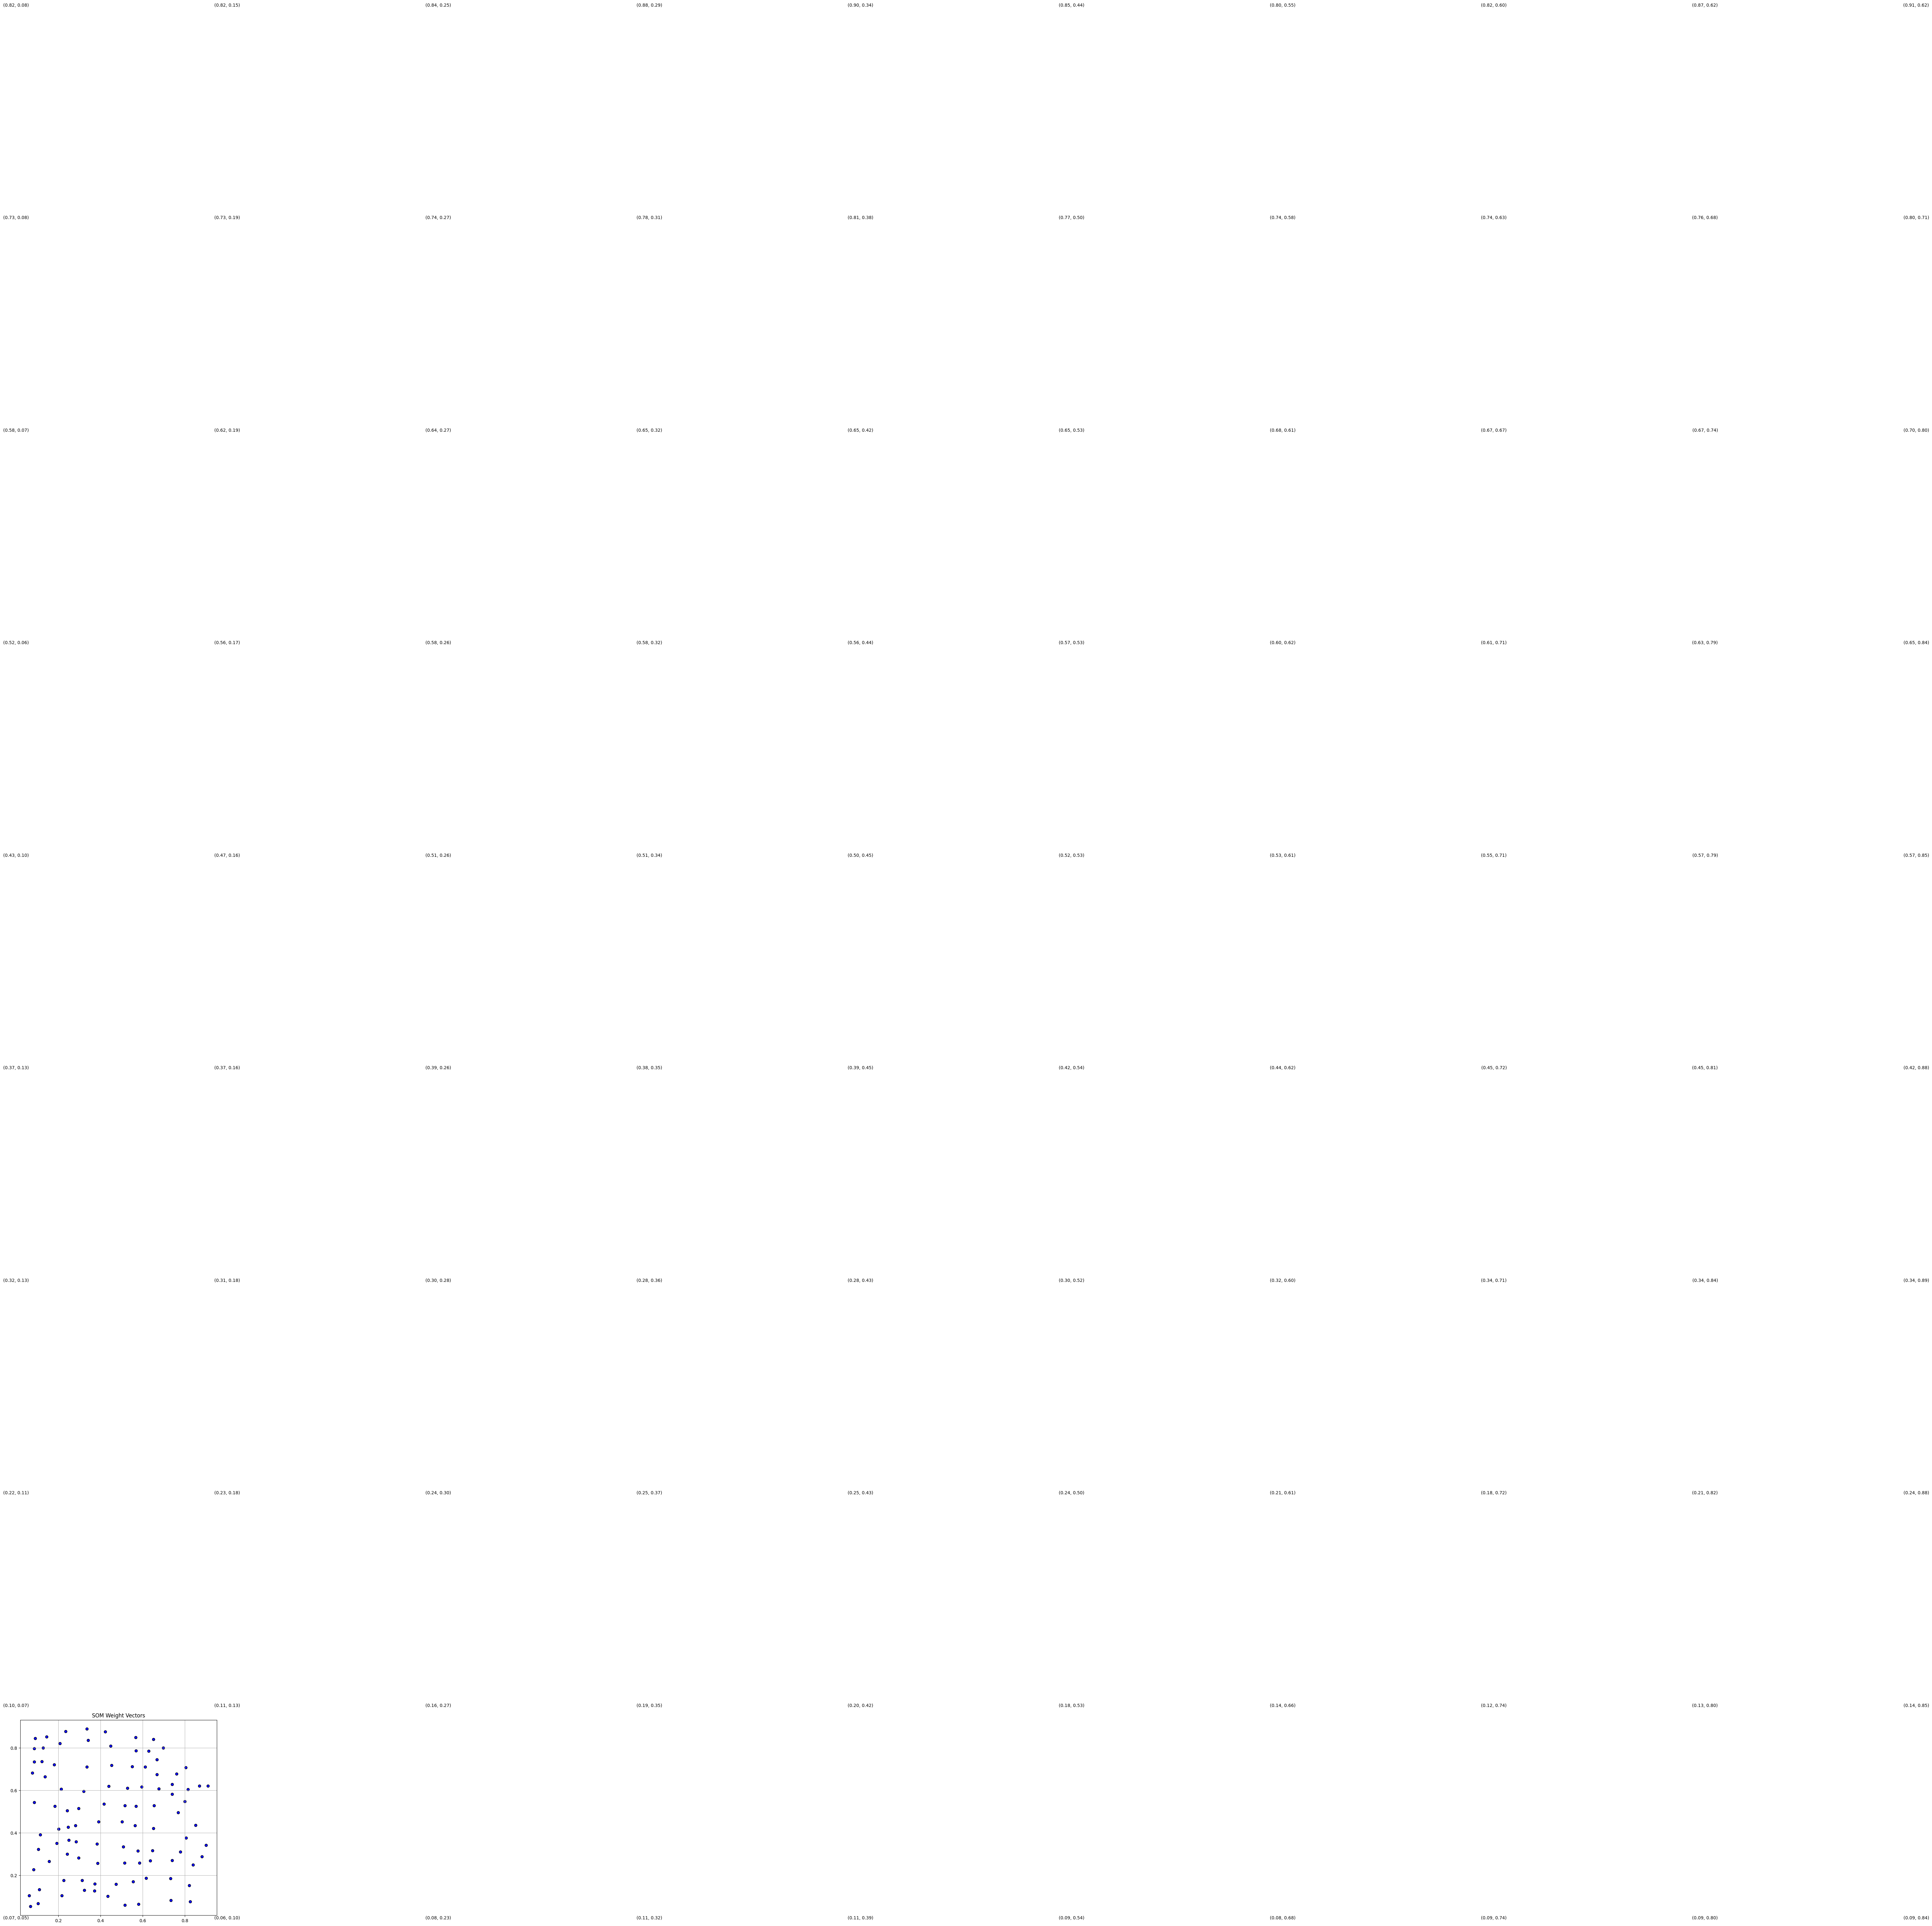

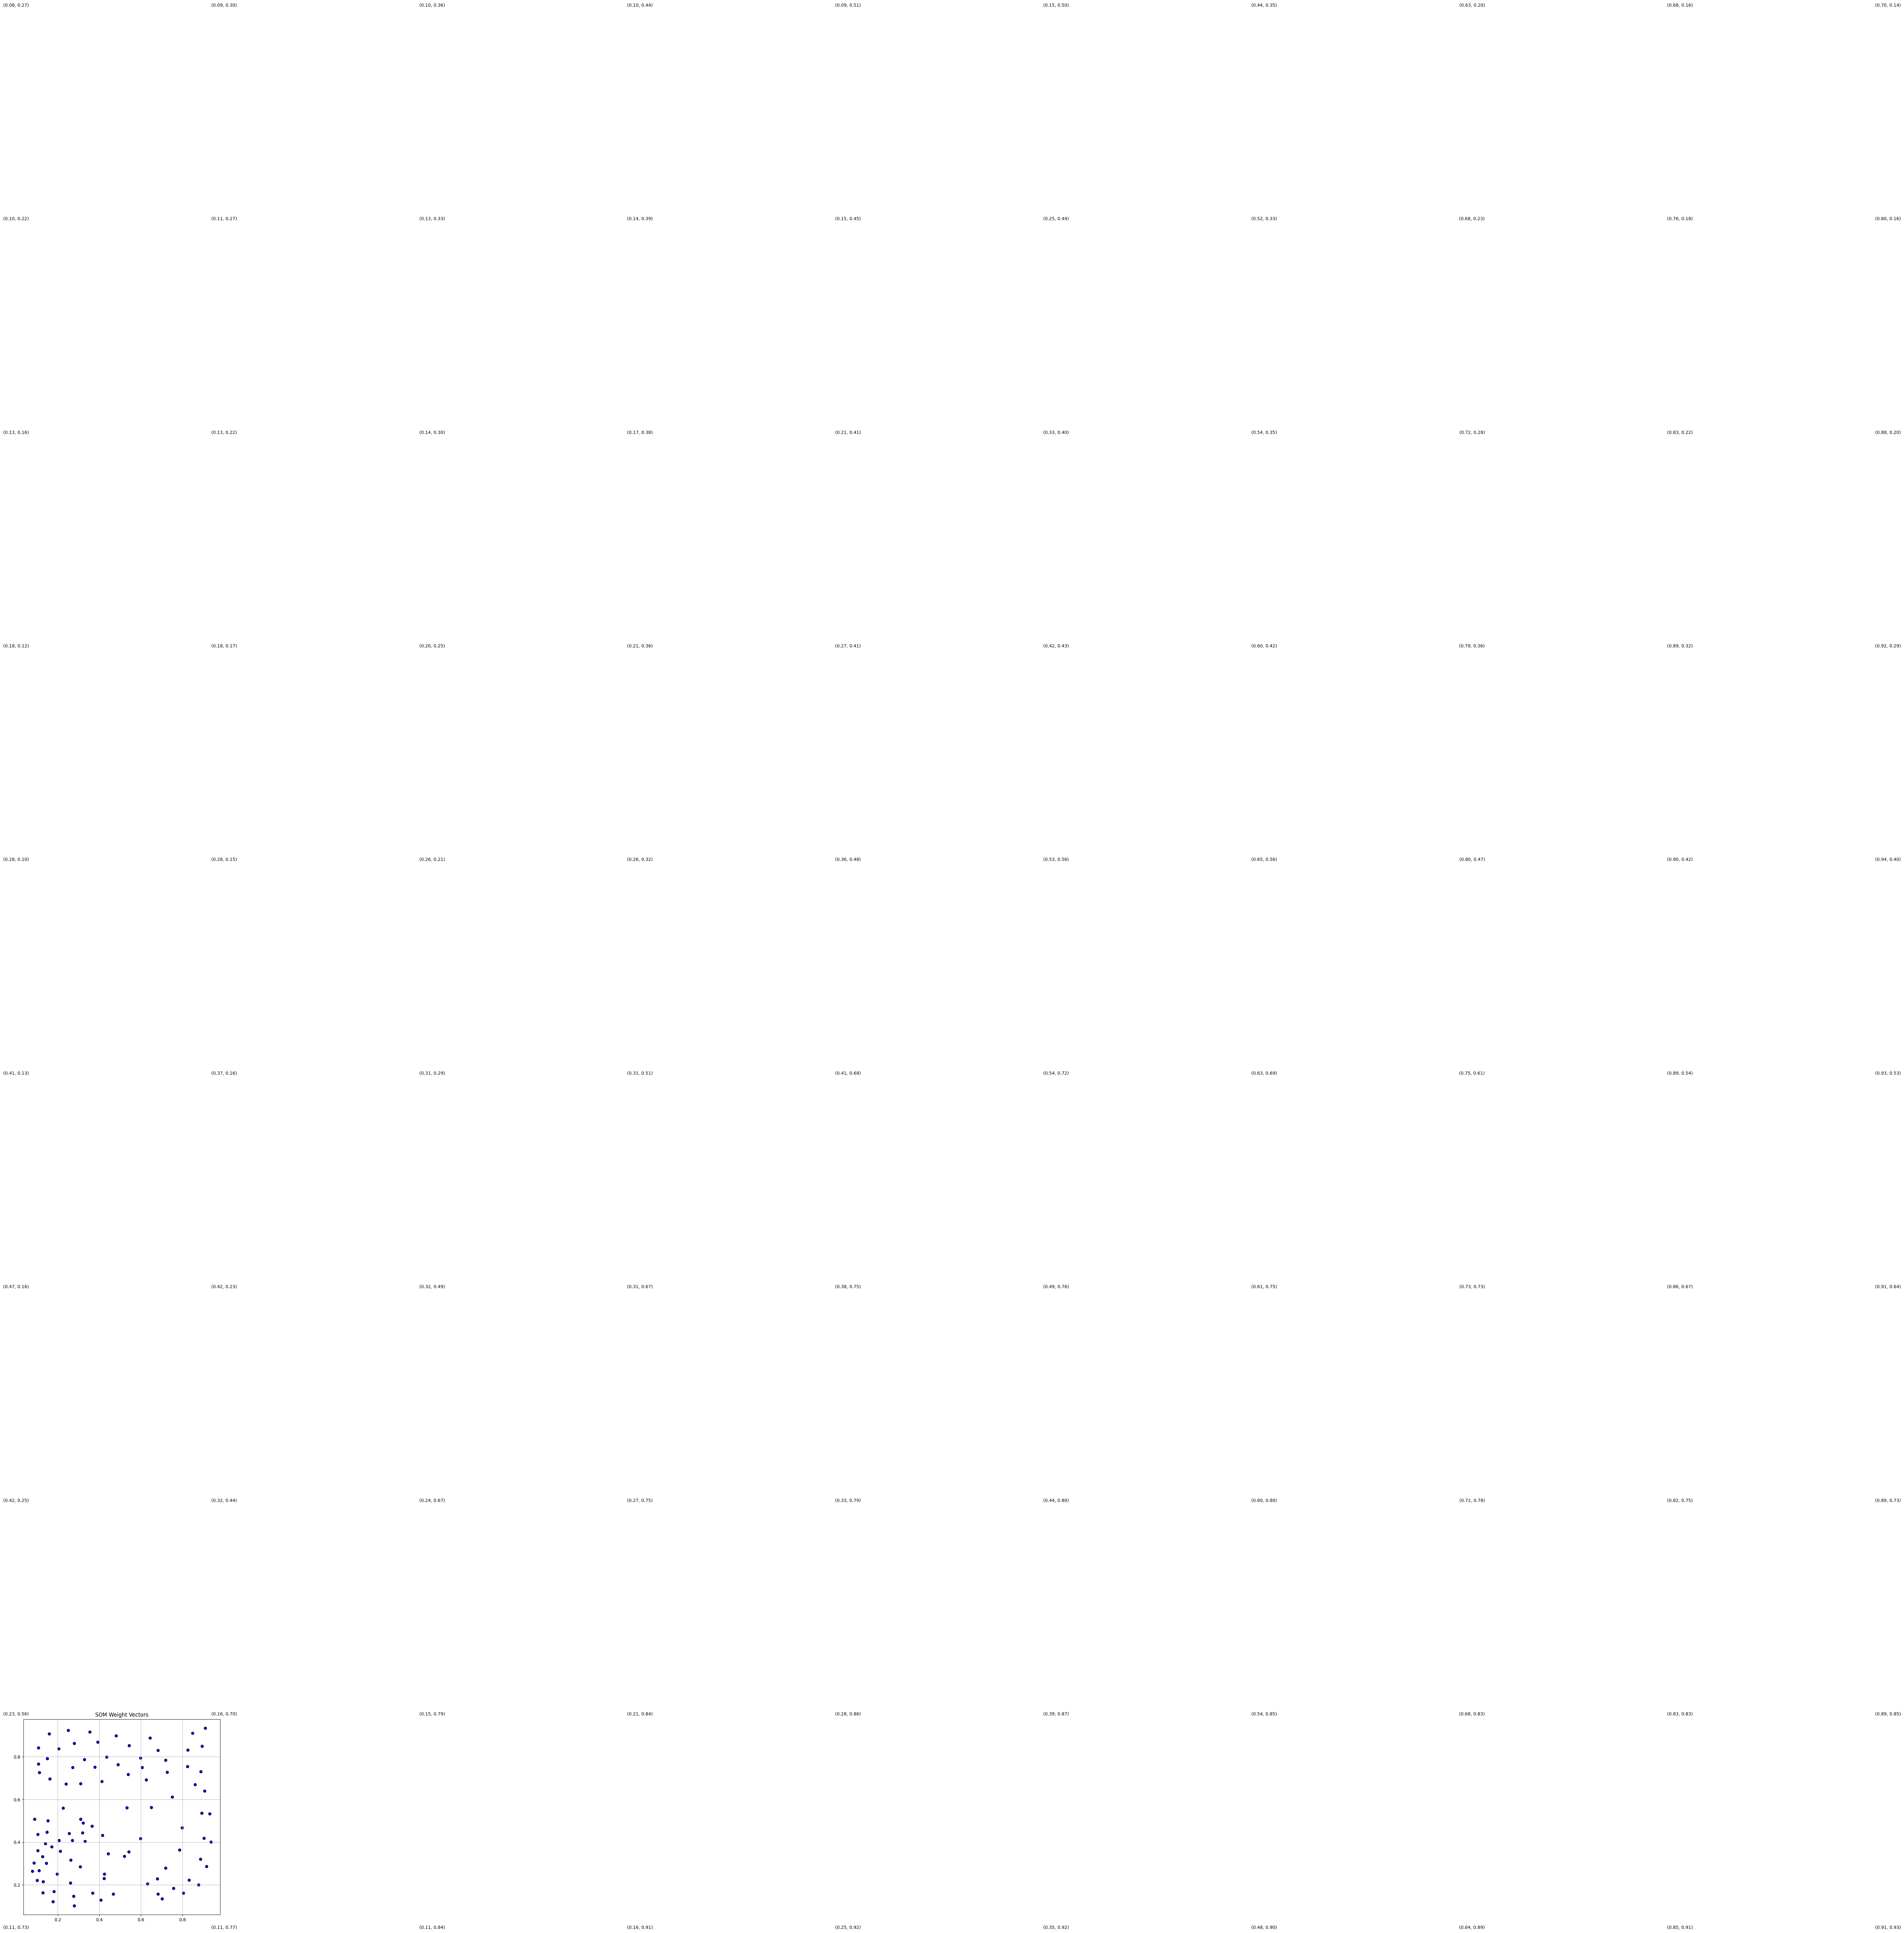

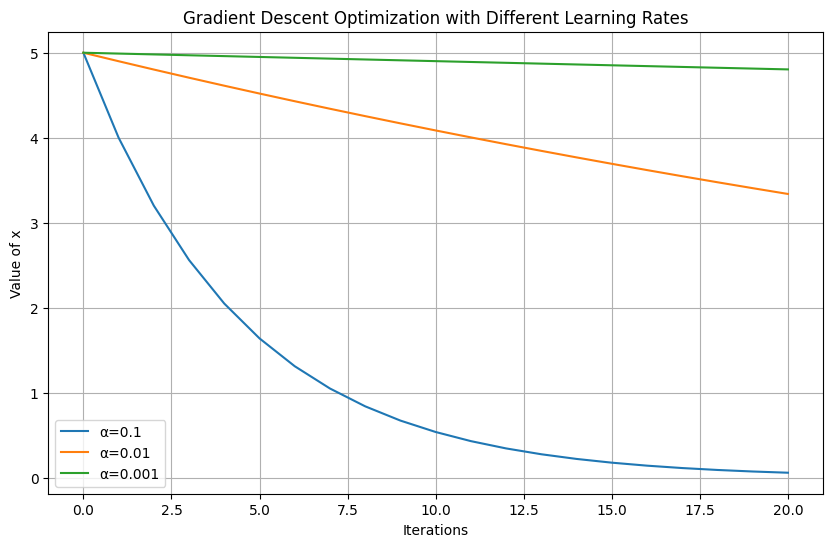

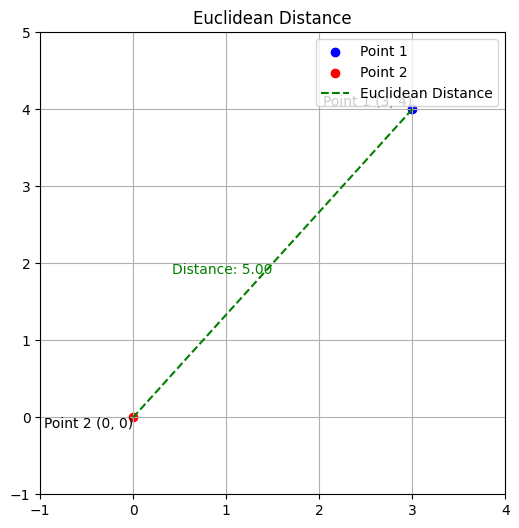

In [7]:
#Task 2: Weight Vector experiment
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
data = np.random.rand(100, 2)

# SOM parameters
grid_shape = (10, 10)  # SOM grid shape
input_dim = data.shape[1]  # Input data dimension
learning_rate = 0.5
sigma = 1.0

# Initialize the SOM weights
som_weights = np.random.rand(grid_shape[0], grid_shape[1], input_dim)

# SOM training
def train_som(data, som_weights, num_epochs, learning_rate, sigma):
    for epoch in range(num_epochs):
        for input_vector in data:
            # Find the best matching unit (BMU)
            bmu = np.unravel_index(np.argmin(np.linalg.norm(som_weights - input_vector, axis=2)), som_weights.shape[:2])

            # Update weights
            for i in range(grid_shape[0]):
                for j in range(grid_shape[1]):
                    distance = np.linalg.norm(np.array([i, j]) - np.array(bmu))
                    influence = np.exp(-distance**2 / (2 * sigma**2))
                    som_weights[i, j] += learning_rate * influence * (input_vector - som_weights[i, j])

train_som(data, som_weights, num_epochs=1000, learning_rate=learning_rate, sigma=sigma)

# Visualize the weight vectors
plt.figure(figsize=(8, 8))
plt.title("SOM Weight Vectors")
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        plt.scatter(som_weights[i, j, 0], som_weights[i, j, 1], c='b', marker='o', edgecolors='k')
        plt.text(i, j, f'({som_weights[i, j, 0]:.2f}, {som_weights[i, j, 1]:.2f})', va='center', ha='center')

plt.grid()
plt.show()


#Task 2: SOM grid experiment

import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
data = np.random.rand(100, 2)

# SOM parameters
grid_shape = (10, 10)
input_dim = data.shape[1]
learning_rate = 0.5
sigma = 1.0

# Initialize the SOM weights
som_weights = np.random.rand(grid_shape[0], grid_shape[1], input_dim)

# Train the SOM
def train_som(data, som_weights, num_epochs, learning_rate, sigma):
    for epoch in range(num_epochs):
        for input_vector in data:
            # Find the best matching unit (BMU)
            bmu = np.unravel_index(np.argmin(np.linalg.norm(som_weights - input_vector, axis=2)), som_weights.shape[:2])

            # Update weights
            for i in range(grid_shape[0]):
                for j in range(grid_shape[1]):
                    distance = np.linalg.norm(np.array([i, j]) - np.array(bmu))
                    influence = np.exp(-distance**2 / (2 * sigma**2))
                    som_weights[i, j] += learning_rate * influence * (input_vector - som_weights[i, j])

train_som(data, som_weights, num_epochs=1000, learning_rate=learning_rate, sigma=sigma)

# Visualize the weight vectors
plt.figure(figsize=(8, 8))
plt.title("SOM Weight Vectors")
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        plt.scatter(som_weights[i, j, 0], som_weights[i, j, 1], c='b', marker='o', edgecolors='k')
        plt.text(i, j, f'({som_weights[i, j, 0]:.2f}, {som_weights[i, j, 1]:.2f})', va='center', ha='center')

plt.grid()
plt.show()



#Task 2: experiment with Learning rate
import numpy as np
import matplotlib.pyplot as plt

# Define the function to optimize (a simple quadratic function)
def objective_function(x):
    return x**2

# Gradient of the objective function (derivative)
def gradient(x):
    return 2 * x

# Define the initial guess and learning rates
initial_guess = 5.0
learning_rates = [0.1, 0.01, 0.001]

# Number of iterations for each learning rate
num_iterations = 20

# Lists to store the optimization history for each learning rate
optimization_history = []

# Perform optimization for each learning rate
for learning_rate in learning_rates:
    x = initial_guess
    history = [x]
    for _ in range(num_iterations):
        x -= learning_rate * gradient(x)
        history.append(x)
    optimization_history.append(history)

# Plot the optimization process for different learning rates
plt.figure(figsize=(10, 6))
for i, learning_rate in enumerate(learning_rates):
    plt.plot(optimization_history[i], label=f'α={learning_rate}')
plt.title('Gradient Descent Optimization with Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Value of x')
plt.legend()
plt.grid()
plt.show()


#Task 2: Euclidean Distance experiment
import numpy as np
import matplotlib.pyplot as plt

# Define two points as NumPy arrays
point1 = np.array([3, 4])  # Replace these values with your own data
point2 = np.array([0, 0])  # Replace these values with your own data

# Calculate Euclidean distance
euclidean_distance = np.linalg.norm(point1 - point2)

# Create a plot
plt.figure(figsize=(6, 6))
plt.title("Euclidean Distance")

# Plot the two points
plt.scatter(point1[0], point1[1], color='blue', label='Point 1')
plt.scatter(point2[0], point2[1], color='red', label='Point 2')

# Draw the line representing the Euclidean distance
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], linestyle='--', color='green', label='Euclidean Distance')

# Add labels for the points
plt.text(point1[0], point1[1], f'Point 1 ({point1[0]}, {point1[1]})', ha='right', va='bottom')
plt.text(point2[0], point2[1], f'Point 2 ({point2[0]}, {point2[1]})', ha='right', va='top')

# Add the Euclidean distance value as text
plt.text((point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2, f'Distance: {euclidean_distance:.2f}', color='green', ha='right', va='top')

# Set axis limits
plt.xlim(-1, 4)
plt.ylim(-1, 5)

# Add legend
plt.legend()

# Display the plot
plt.grid()
plt.show()

